## T1-1. 이상치를 찾아라(IQR활용) Expected Questions

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv('data/BDC/titanic/train.csv')

In [2]:
# 간단한 탐색적 데이터 분석 (EDA)
print(df.shape)
print(df.isnull().sum())
df.head()

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# IQR 구하기
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)

# numpy 활용시
# Q1 = np.percentile(df['Fare'], 25)
# Q3 = np.percentile(df['Fare'], 75)

IQR = Q3 - Q1
Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

(-26.724, 65.6344)

In [4]:
# 이상치 데이터 구하기
outdata1 = df[df['Fare']<(Q1 - 1.5 * IQR)]
outdata2 = df[df['Fare']>(Q3 + 1.5 * IQR)]
len(outdata1), len(outdata2)

(0, 116)

In [5]:
# 이상치 데이터에서 여성 수 구하기, 출력하기 print()
print(sum(outdata2['Sex'] == 'female'))

70


## T1-2. 이상치를 찾아라(소수점 나이) Expected Questions

In [9]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [10]:
# 소수점 데이터 찾기
df = df[(df['age']-np.floor(df['age']))!= 0]
df

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [11]:
# 이상치를 포함한 데이터 올림, 내림, 버림의 평균값 

# 올림
m_ceil = np.ceil(df['age']).mean()

# 내림
m_floor = np.floor(df['age']).mean()

# 버림
m_trunc = np.trunc(df['age']).mean()

m_ceil, m_floor, m_trunc

(23.75, 22.75, 23.0)

In [12]:
# 평균값 더한 다음 출력
print(m_ceil + m_floor + m_trunc)

69.5


## T1-3. 결측치 처리(map 활용) Expected Questions

In [13]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [14]:
# EDA - 결측값 확인
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

In [15]:
# 데이터 shape
df.shape

(100, 8)

In [16]:
# EDA - 결측비율 확인
df.isnull().sum()/df.shape[0]

id      0.00
age     0.00
city    0.00
f1      0.31
f2      0.00
f3      0.95
f4      0.00
f5      0.00
dtype: float64

In [17]:
# f3 컬럼 삭제
print("삭제 전:", df.shape)
df = df.drop(['f3'], axis=1)
print("삭제 후:", df.shape)

# 결측치가 있는 컬럼을 제거하는 2가지 방법
# df.drop(['B', 'C'], axis=1)
# df.drop(columns=['B', 'C'])

삭제 전: (100, 8)
삭제 후: (100, 7)


In [18]:
# 도시 확인
df['city'].unique()

array(['서울', '부산', '대구', '경기'], dtype=object)

In [19]:
# 도시별 중앙값 계산
s=df[df['city']=='서울']['f1'].median()
k=df[df['city']=='경기']['f1'].median()
b=df[df['city']=='부산']['f1'].median()
d=df[df['city']=='대구']['f1'].median()
s, k, b, d

#방법2
# k, d, b, s = df.groupby('city')['f1'].median()

(68.0, 58.0, 62.0, 75.0)

In [20]:
# 대체 전 데이터 샘플 출력
df[18:21]

,id,age,city,f1,f2,f4,f5
18,id19,53.0,서울,NaN,0,ISFP,83.685380
19,id20,11.0,서울,51.0,1,INTJ,91.297791
20,id21,90.0,부산,NaN,1,ISFP,29.269869


In [21]:
# f1결측치 city별 중앙값으로 대체
df['f1'] = df['f1'].fillna(df['city'].map({'서울':s,'경기':k,'부산':b,'대구':d}))

# 만약 그냥 f1 중앙값으로 대체 한다면 
# df['f1'] = df['f1'].fillna(df['f1'].median())

In [22]:
# 대체 후 데이터 샘플 출력
df[18:21]

,id,age,city,f1,f2,f4,f5
18,id19,53.0,서울,68.0,0,ISFP,83.685380
19,id20,11.0,서울,51.0,1,INTJ,91.297791
20,id21,90.0,부산,62.0,1,ISFP,29.269869


In [23]:
#결과 출력
print(df['f1'].mean())

65.52


## T1-4. 왜도와 첨도 구하기 (로그스케일) Expected Questions

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
df = pd.read_csv("data/BDC/house-prices-advanced-regression-techniques/train.csv")
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:>

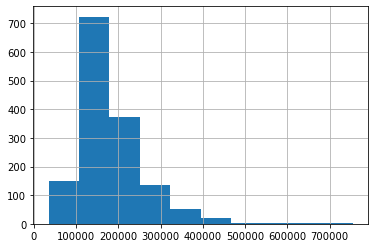

In [3]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [4]:
# 'SalePrice'컬럼 왜도와 첨도계산
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print("왜도:" ,s1)
print("첨도:" ,k1)

왜도: 1.8828757597682129
첨도: 6.536281860064529


In [5]:
# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice'])

<AxesSubplot:>

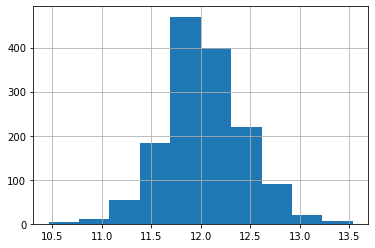

In [6]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [7]:
# 'SalePrice'컬럼 왜도와 첨도계산
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
print("왜도:" ,s2)
print("첨도:" ,k2)

왜도: 0.12134661989685329
첨도: 0.809519155707878


In [8]:
# 모두 더한 다음 출력
print(round(s1+s2+k1+k2,2))

9.35


## T1-5. 조건에 맞는 데이터 표준편차 구하기 Expected Questions

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 맞는 데이터
df[df['f4']=='ENFJ']

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
32,id33,47.0,부산,94.0,0,NaN,ENFJ,17.252986
40,id41,81.0,대구,55.0,0,NaN,ENFJ,37.113739
44,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
53,id54,53.0,대구,NaN,1,NaN,ENFJ,69.730313


In [3]:
df[df['f4']=='ENFJ']['f1'].std()

17.727097901235837

In [4]:
# 조건에 맞는 f1의 표준편차
enfj = df[df['f4']=='ENFJ']['f1'].std()
enfj

17.727097901235837

In [5]:
# 조건에 맞는 f1의 표준편차
infp = df[df['f4']=='INFP']['f1'].std()
infp

23.586719427112648

In [6]:
# 두 표준편차 차이 절대값 출력
print(np.abs(enfj - infp))

5.859621525876811


## T1-6. 결측치 제거 및 그룹 합계 Expected Questions

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# f1컬럼 결측치 제거
df = df[~df['f1'].isnull()]

In [3]:
# 그룹 합계 계산
df2 = df.groupby(['city','f2']).sum()
df2

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [4]:
# 조건에 맞는 값 출력
print(df2.iloc[0]['f1'])

833.0


## T1-7. 값 변경 및 2개 이상의 조건 Expected Questions

In [5]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [6]:
# ESFJ 값을 가진 데이터 확인
df[df['f4'] == 'ESFJ']

,id,age,city,f1,f2,f3,f4,f5
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
12,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
30,id31,86.0,부산,77.0,0,NaN,ESFJ,73.586397
58,id59,64.0,대구,NaN,1,NaN,ESFJ,20.129444
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [7]:
# 값 변경하기
df['f4'] = df['f4'].replace('ESFJ', 'ISFJ')

In [8]:
# ESFJ 값을 가진 데이터 확인
df[df['f4'] == 'ESFJ']

,id,age,city,f1,f2,f3,f4,f5


In [9]:
# 2개의 조건에 맞는 값
df[(df['f4'] == 'ISFJ') & (df['city'] == '경기')]

,id,age,city,f1,f2,f3,f4,f5
62,id63,88.0,경기,86.0,1,NaN,ISFJ,73.586397
66,id67,66.0,경기,52.0,1,NaN,ISFJ,73.586397
72,id73,90.0,경기,NaN,1,NaN,ISFJ,73.586397
80,id81,86.0,경기,50.0,1,NaN,ISFJ,37.113739
98,id99,1.0,경기,47.0,0,NaN,ISFJ,97.381034


In [10]:
# 2개의 조건에 맞는 값중 age컬럼의 최대값
df[(df['f4'] == 'ISFJ') & (df['city'] == '경기')]['age'].max()

90.0

## T1-8. 누적합 그리고 보간(결측치 처리) Expected Questions

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('data/BDC/bdc_basic/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# 조건에 따른 누적합
df2 = df[df['f2']==1]['f1'].cumsum()
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16       NaN
19     534.0
20       NaN
21     606.0
22     681.0
25     738.0
27     772.0
33       NaN
35     849.0
37       NaN
46     924.0
49    1002.0
51    1084.0
53       NaN
55       NaN
58       NaN
62    1170.0
65       NaN
66    1222.0
69    1318.0
72       NaN
77    1414.0
80    1464.0
82    1514.0
86       NaN
88    1580.0
91    1658.0
93       NaN
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [3]:
# 결측치 처리 (뒤에 나오는 값으로 채움)
df2 = df2.fillna(method = 'bfill')
df2

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16     534.0
19     534.0
20     606.0
21     606.0
22     681.0
25     738.0
27     772.0
33     849.0
35     849.0
37     924.0
46     924.0
49    1002.0
51    1084.0
53    1170.0
55    1170.0
58    1170.0
62    1170.0
65    1222.0
66    1222.0
69    1318.0
72    1414.0
77    1414.0
80    1464.0
82    1514.0
86    1580.0
88    1580.0
91    1658.0
93    1701.0
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [4]:
# 평균 출력
print(df2.mean())

980.3783783783783
